## 최소위험 포트폴리오 만들기(2020년 8월 10일 ~ 2021년 9월 15일 ETF 데이터 이용)

## 라이브러리 import

In [1]:
import pandas as pd     # 행과 열을 가진 DATA를 이용할 수 있게 해주는 패키지
import numpy as np     # 수학 연산을 위한 패키지 
import matplotlib.pyplot as plt     #그래프를 그릴때 쓰는 패키지

In [56]:
def get_font_family():
    import platform
    system_name = platform.system()
   
    if system_name == "Windows":
        font_family = "Malgun Gothic"
   
    return font_family

In [57]:
# 시각화를 위한 폰트설정
a = get_font_family()
# 폰트설정
import matplotlib.pyplot as plt 
plt.rc("font", family = a)

In [54]:
import warnings
warnings.filterwarnings('ignore')    # 경고 메시지 무시

## 데이터 불러오기

In [49]:
df1 = pd.read_csv('C:/Users/qhgus/RichGo/ETF데이터.csv', index_col = '날짜', thousands = ',') #, index_col = '날짜'
df1

,S&P500,골드선물,농산물,WTI원유선물
날짜,,,,
2021년 09월 15일,13100,13025,6310,10780
2021년 09월 14일,13200,12955,6320,10800
2021년 09월 13일,13240,12935,6285,10700
2021년 09월 10일,13260,13010,6275,10435
2021년 09월 09일,13235,12925,6320,10555
...,...,...,...,...
2020년 08월 14일,10095,14375,4070,6680
2020년 08월 13일,10055,14245,4035,6690
2020년 08월 12일,10005,14005,3985,6625


In [50]:
df2 = pd.read_csv('C:/Users/qhgus/RichGo/미국채10년.csv', index_col = '날짜', thousands = ',') #, index_col = '날짜'
df2

,미국채10년
날짜,
2021년 09월 15일,12155
2021년 09월 14일,12120
2021년 09월 13일,12165
2021년 09월 10일,12120
2021년 09월 09일,12105
...,...
2020년 08월 14일,12565
2020년 08월 13일,12575
2020년 08월 12일,12630


## 데이터 합치기

In [60]:
df = pd.merge(df1, df2, left_on='날짜', right_on='날짜', how='inner')
df.sort_values('날짜', inplace=True)
df

,S&P500,골드선물,농산물,WTI원유선물,미국채10년
날짜,,,,,
2020년 08월 10일,10035,15020,3980,6595,12705
2020년 08월 11일,10045,14715,3995,6640,12670
2020년 08월 12일,10005,14005,3985,6625,12630
2020년 08월 13일,10055,14245,4035,6690,12575
2020년 08월 14일,10095,14375,4070,6680,12565
...,...,...,...,...,...
2021년 09월 09일,13235,12925,6320,10555,12105
2021년 09월 10일,13260,13010,6275,10435,12120
2021년 09월 13일,13240,12935,6285,10700,12165


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 2020년 08월 10일 to 2021년 09월 15일
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   S&P500   274 non-null    int64
 1   골드선물     274 non-null    int64
 2   농산물      274 non-null    int64
 3   WTI원유선물  274 non-null    int64
 4   미국채10년   274 non-null    int64
dtypes: int64(5)
memory usage: 12.8+ KB


## 수익률 그래프로 나타내기

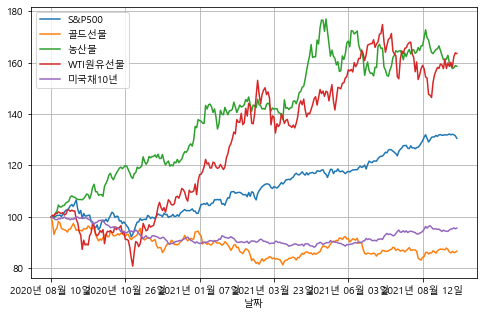

In [62]:
(df / df.iloc[0] * 100).plot(figsize=(8, 5), grid=True)     # 비율로 표시
plt.show()

## 수익률 계산

### 수익률표 생성

In [63]:
rets = np.log(df/df.shift(1))     # 로그수익률로 표시
rets.tail(5)

,S&P500,골드선물,농산물,WTI원유선물,미국채10년
날짜,,,,,
2021년 09월 09일,-0.002641,-0.004246,-0.006309,0.009998,0.003724
2021년 09월 10일,0.001887,0.006555,-0.007146,-0.011434,0.001238
2021년 09월 13일,-0.001509,-0.005781,0.001592,0.025078,0.003706
2021년 09월 14일,-0.003026,0.001545,0.005553,0.009302,-0.003706
2021년 09월 15일,-0.007605,0.005389,-0.001584,-0.001854,0.002884


### 평균수익률 계산

In [64]:
rets.mean()*12

S&P500     0.011716
골드선물      -0.006264
농산물        0.020257
WTI원유선물    0.021599
미국채10년    -0.001945
dtype: float64

### 동일비중 행렬(w) 만들기
```자산의 투자비중을 지정하기 위함```

In [65]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])     # 자산비중 행렬만들기

### w 비중으로 투자한 포트폴리오 수익률 계산

In [67]:
crets = np.sum(rets.mean()*weights)*12
crets

0.009072534653420254

## 위험(분산) 계산

### 공분산 행렬 만들기

In [69]:
covmat = rets.cov()*12
covmat

,S&P500,골드선물,농산물,WTI원유선물,미국채10년
S&P500,0.000857,0.000107,0.000038,0.000492,-0.000006
골드선물,0.000107,0.001236,0.000471,0.000189,-0.000096
농산물,0.000038,0.000471,0.002595,0.000743,-0.000121
WTI원유선물,0.000492,0.000189,0.000743,0.005324,-0.000378
미국채10년,-0.000006,-0.000096,-0.000121,-0.000378,0.000257


### 포트폴리오 분산 구하기

In [72]:
variance = weights.T @ covmat @ weights     # @가 행렬의 곱을 뜻하는 듯
# weights를 가로 행렬로 바꾸기 위해 T 적용함
variance

0.0005259327857152332

> 참고링크
https://steemit.com/dclick/@thrufore/day1-with-python-1539363882146

## 위험과 수익의 관계
``` 포트폴리오 비중 변경 시 수익률과 분산이 어떻게 변하는지 알아보기```

### 자료 쌓아나갈 장소 지정

In [73]:
prets = []     # 리스트 형태로 수익을 쌓을 장소
pvols = []     # 리스트 형태로 위험(표준편차)을 쌓을 장소

### 지정한 장소에 3000개의 시뮬레이션 자료 쌓기

In [74]:
for p in range (3000):     # 3000회 반복
    weights = np.random.random(5)   # 랜덤한 5개의 숫자를 생성함(5개의 자산에 대응하는..)
    weights /= np.sum(weights)     # 5개의 숫자의 합계가 1이 되도록 조정함(각 자산의 비중)
    prets.append(np.sum(rets.mean() * weights) * 12)    # 계산된 포트폴리오 수익을 prets에 저장
    covmat = rets.cov() * 12     # cov matrix 만들기
    pvols.append(np.sqrt(weights.T @ covmat @ weights)) # 계산된 포트폴리오 위험을 pvols에 저장한다.

### 저장된 자료의 형태를 계산하기 쉬운 형태로 바꾸기

In [75]:
prets = np.array(prets)
pvols = np.array(pvols)

### 위험과 수익의 관계를 그래프로 나타내기

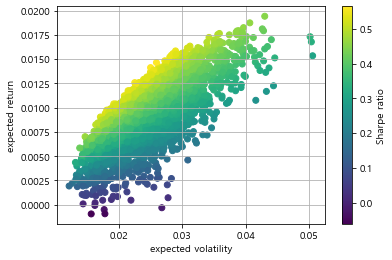

In [76]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

## 최소위험 포트폴리오(Minimum Volatility Portfolio)

### 라이브러리 호출

In [77]:
import scipy.optimize as sco

### 최적화 대상 함수 만들기
```위험 최소화```

In [78]:
def minvar(weights):
    return np.sqrt(weights.T @ covmat @ weights)

### 최적화 위한 입력조건 설정
- 추측값 : 최적화 추측값이 있으면 설정, 없으면 아무값이나 넣기

In [79]:
w = np.array([0.20, 0.20, 0.20, 0.20, 0.20])     # 추측치 : 아무값이나 넣기

- 최적화 방법 : SQP 선택 

In [80]:
method='SLSQP'

- 변수범위설정 : 투자 비중이므로 0~1 사이로 설정

In [81]:
bnds = ((0,1), (0,1), (0,1), (0,1), (0,1))

- 제약조건 설정 : 비중의 합이 1이 되도록 설정

In [82]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})     # 합계가 1이 되도록.. eq는 같다를 의미

### 최적화 코드

In [83]:
def minvar(weights):
    return np.sqrt(weights.T @ covmat @ weights)

w = np.array([0.20, 0.20, 0.20, 0.20, 0.20]) 
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = ((0,1), (0,1), (0,1), (0,1), (0,1))

opt = sco.minimize(minvar, w, method='SLSQP', bounds=bnds, constraints=cons)

### 결과값 출력

In [84]:
opt

     fun: 0.01155549457271862
     jac: array([0.01154553, 0.01161875, 0.01150236, 0.01139201, 0.01156114])
 message: 'Optimization terminated successfully'
    nfev: 96
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([0.11304454, 0.12651088, 0.04306507, 0.05107266, 0.66630684])

> 최적화 결과 = x </p>
- S&P500 : 11.30%
- 골드선물 : 12.65%
- 농산물 : 4.31%
- WTI원유선물 : 5.11% 
- 미국채10년 : 66.63%

### 수익과 위험 측정

In [85]:
orets = np.sum(rets.mean() * opt['x']) * 12
ovol = np.sqrt(opt['x'].T @ covmat @ opt['x'])

### 최소위험 포트폴리오 그래프에 나타내기

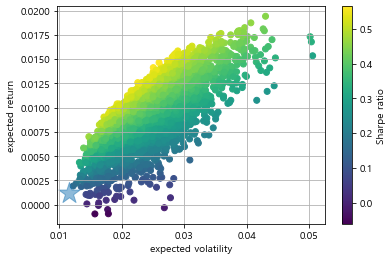

In [86]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

plt.scatter(ovol, orets, marker="*", s=500, alpha=0.5)
plt.show()

> 참조링크 https://steemit.com/dclick/@thrufore/day2-with-python-1539446432982